Basics of Probability

1. a) coin toss

In [2]:
import random

In [64]:
def coin_toss():
    head = 0
    tail = 0
    for _ in range(10000):
        a = random.randint(0,1)
        if a == 1:
            head += 1
        else :
            tail += 1
    print("probability of heads : ", head/10000, "Count of heads : ", head)
    print("probability of tails : ", tail/10000, "Count of tails : ", tail)
coin_toss()

probability of heads :  0.501 Count of heads :  5010
probability of tails :  0.499 Count of tails :  4990


1. b) dice throw

In [65]:
def dice_throw():
    count = 0
    for i in range(1,7):
        for j in range(1,7):
            if i+j == 7:
                count += 1
    print("The Probability of getting the sum of 7 : ", count/36)


dice_throw()

The Probability of getting the sum of 7 :  0.16666666666666666


2. probability of getting 6 at least once in 10 roll of a fair dice

In [5]:
def dice_10():
    repeat = 10000
    num = 0
    for _ in range(repeat):
        count = 0
        for _ in range(10):
            a = random.randint(1,6)
            if a == 6:
                count += 1
            b = count/10
        num = num + b
    num = num/repeat
    print("probability of rolling dice for atleast one 6 : ", 1-num)

dice_10()

probability of rolling dice for atleast one 6 :  0.8338400000000036


Conditional Probability and Bayes' Theorem

In [15]:
# number of red ball = 5
# number of red green = 7
# number of red blue = 8
# total number of balls in bag = 20
# Probability of getting a red ball = 5/20
# Probability of getting a green ball = 7/20
# Probability of getting a blue ball = 8/20


#balls in the bag
ball = ["red"]*5 + ["green"]*7 + ["blue"]*8
draws = 1000
drawn_seq = []

#drawing ball at random and keeping sequence
for _ in range(draws):
    drawn_seq.append(random.choice(ball))

#initiallizing the variable needed
count_prev_blue = 0
count_red_given_blue = 0

count_red = 0
count_blue = 0
count_blue_given_red = 0

for i in range(1,draws):
    current = drawn_seq[i]
    previous = drawn_seq[i-1]

    if current == "red" :
        count_red += 1
    if previous == "blue":
        count_prev_blue += 1
        if current == "red":
            count_red_given_blue += 1
    if current == "blue":
        count_blue += 1
    if previous == "red" and current == "blue":
        count_blue_given_red += 1

p_red = count_red/(draws-1)
p_blue = count_blue/(draws-1)
p_red_given_blue = count_red_given_blue/count_prev_blue if count_prev_blue > 0 else 0
p_blue_given_red = count_blue_given_red/count_red if count_red > 0 else 0

#baye's theorem

bayes_estimate = (p_blue_given_red * p_red)/p_blue  if p_blue > 0 else 0

#outputs comparision

print("probability of picking red when previous one is blue (experimently) : ", p_red_given_blue)
print("probability of picking red when previous one is blue (theoratically) : ", bayes_estimate)

print("diffenece : ", bayes_estimate - p_red_given_blue)




probability of picking red when previous one is blue (experimently) :  0.2430379746835443
probability of picking red when previous one is blue (theoratically) :  0.2518518518518518
diffenece :  0.008813877168307532


Random Variables and Discrete Probability



In [33]:
import numpy as np

values = [1,2,3]
probs = [0.25,0.35,0.4]
sample_size = 1000

sample = np.random.choice(values, size = sample_size, p = probs)

mean = np.mean(sample)
var = np.var(sample)
std = np.std(sample)

print(f"Mean of the sample : {mean:.4f}")
print(f"Variance of the sample : {var:.4f}")
print(f"Standard Deviation : {std:.4f}")



Mean of the sample : 2.1420
Variance of the sample : 0.6458
Standard Deviation : 0.8036


Continuous Random Variables

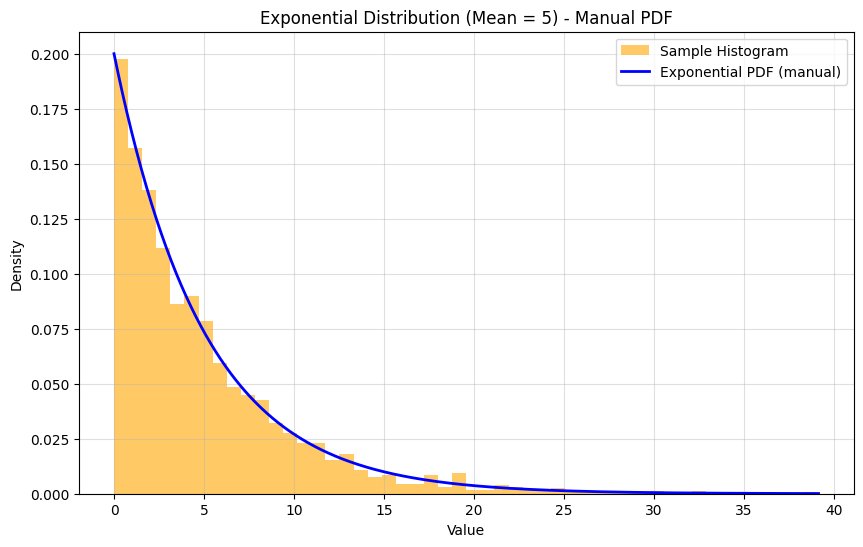

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mean = 5
lam = 1 / mean  
sample_size = 2000

# Step a: Generate 2000 samples
samples = np.random.exponential(scale=mean, size=sample_size)

# Step b: Plot histogram
plt.figure(figsize=(10, 6))
count, bins, _ = plt.hist(samples, bins=50, density=True, alpha=0.6, color='orange', label='Sample Histogram')

#PDF calculation
x = np.linspace(0, max(samples), 1000)
pdf = lam * np.exp(-lam * x)

# Plot the manually calculated PDF
plt.plot(x, pdf, 'b-', lw=2, label='Exponential PDF (manual)')

# Labels and legend
plt.title("Exponential Distribution (Mean = 5) - Manual PDF")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.4)

plt.show()


Central Limit Theorem

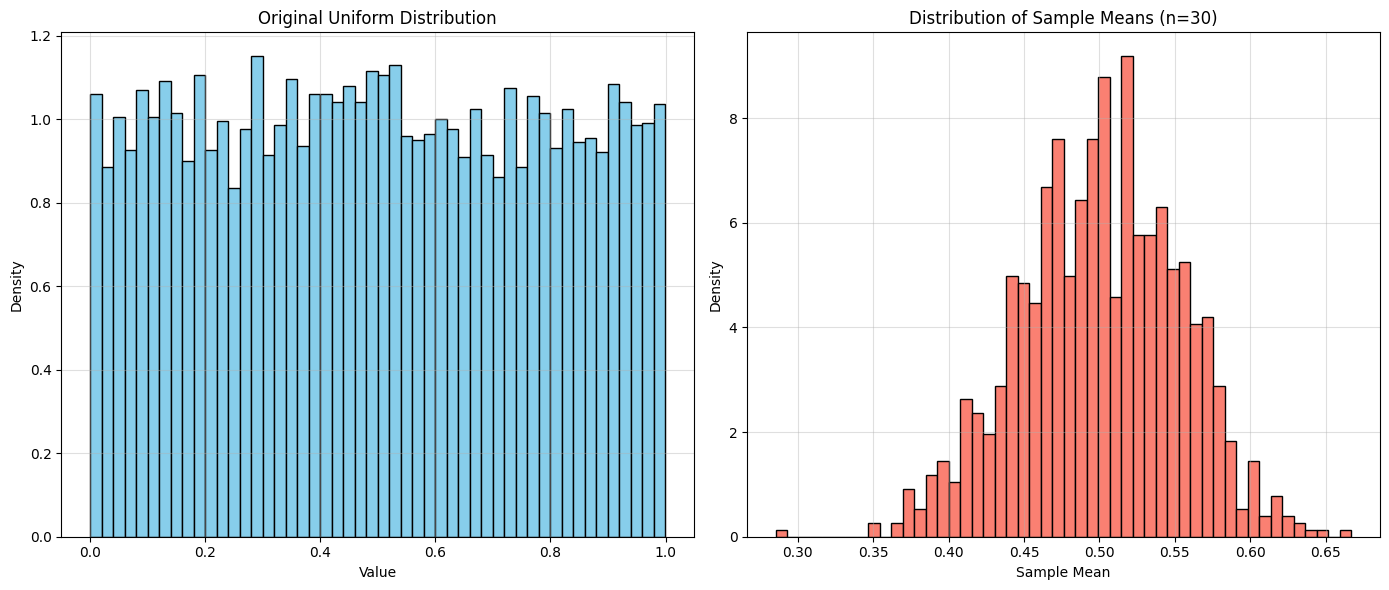

In [37]:
import numpy as np
import matplotlib.pyplot as plt

#data generation
uniform_data = np.random.uniform(low=0.0, high=1.0, size=10000)

# Step b: Draw 1000 samples of size 30 and compute their means
sample_size = 30
num_samples = 1000
sample_means = []

for _ in range(num_samples):
    sample = np.random.choice(uniform_data, size=sample_size, replace=False)
    sample_means.append(np.mean(sample))

sample_means = np.array(sample_means)

# Step c: Plot the original uniform distribution
plt.figure(figsize=(14, 6))

# Plot 1: Uniform distribution
plt.subplot(1, 2, 1)
plt.hist(uniform_data, bins=50, density=True, color='skyblue', edgecolor='black')
plt.title("Original Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(alpha=0.4)

# Plot 2: Distribution of sample means
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=50, density=True, color='salmon', edgecolor='black')
plt.title("Distribution of Sample Means (n=30)")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.grid(alpha=0.4)

plt.tight_layout()
plt.show()
